# PROJETO DE ANÁLISES DE DADOS DE UMA REDE DE LOJAS 

### Projeto realizado em : 09/08/2023

![](https://checkbits.com.br/wp-content/uploads/2020/08/Rede-de-Lojas-operacao-padronizada-e-otimizacao-da-gestao.png)

## INTRODUÇÃO

A gestão eficaz desempenha um papel crucial no sucesso de uma rede de lojas que vendem roupas. A indústria de varejo de moda é dinâmica e altamente competitiva, e uma gestão bem estruturada pode fazer a diferença entre o crescimento sustentável e a estagnação. 
A gestão adequada é essencial para entender e atender às demandas em constante mudança dos clientes. Ao analisar dados de vendas e tendências de moda, os gestores podem antecipar as preferências dos clientes e adaptar seu estoque e estratégias de marketing. Além disso, a gestão eficaz garante que as lojas estejam bem abastecidas com produtos populares, evitando rupturas de estoque que possam afetar negativamente a satisfação do cliente. 

Nesse contexto,uma empresa de consultoria em dados foi contratada por um rede de lojas de vendas de roupas masculinas e femininas, a rede reclamava da falta de organização na administração por não ter informações suficientes sobre seus clientes, sendo assim,decidiu tomar suas decisões baseadas nos dados. Ela também tem receio de perder clientes valiosos por falta de uma boa Gestão,sendo assim buscou auxílio na empresa de consultoria em dados.

## PROBLEMA DE NEGÓCIO

 O objetivo da empresa de consultoria contratada, é identificar os clientes mais valiosos para rede de lojas, além de trazer informações sobre o perfil dos clientes para que a rede possa tomar decisões  e organizar melhor sua administração dentro da base de clientes.

### Conhecendo as bases de dados



Sobre a base de dados



Na planilha há quatro abas:



--> Dados de venda

ID: identificador único de uma venda

ProductID: identificador único de um produto

ClientID: identificador único de um cliente

Discount: desconto aplicado em uma venda

UnitPrice: preço unitário de um produto vendido

Quantity: quantidade de produto vendido em uma venda

StoreID: identificador único de uma loja

Date: data de uma venda


--> Dados de consumidores

ID: identificador único de um consumidor

City: cidade/localidade onde um consumidor fez a compra

State: Unidade Federativa onde um consumidor fez a compra

DateOfBirth: data de nascimento de um consumidor
Sex: sexo de um consumidor



--> Dados de lojas

ID: identificador único de uma loja

Name: cidade/localidade de uma loja

State: Unidade Federativa de uma loja


--> Dados de produto

ID: identificador único de um produto

Name: nome de um produto

Size: tamanho de um produto

### Principais técnicas usadas nos dados

- Será usada análise estatísticas descritivas
- Análise de dados nulos e tipo de dados
- Distribuição e contagem dos dados
- Padronização dos dados
- Engenharia de variáveis
- Junção de dataframes
- Construção de novo dataframes
- Visualização dos dados em gráficos

### Importação das bibliotecas

In [1]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# Mais elaborados
import plotly.graph_objects as go
# Mais fácil, de pronto tem gráficos bonitos
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

# REDERIZANDO IMAGEM
import plotly.io as pio
pio.renderers

#pio.renderers.default = "png" # visualizar e salvar em foto para git
#pio.renderers.default = "notebook" # visualizar em outra IDE
pio.renderers.default ='jpeg'# visualizar em outra IDE

### Aqui foi importadas as bases de dados para termos um conhecimento da real situação dos dados

In [2]:
import pandas as pd

df_vendas = pd.read_excel(r"C:\Users\vanio\Downloads\Base de Dados - Questionário (4).xlsx", header=4)
df_produto= pd.read_excel(r"C:\Users\vanio\Downloads\Base de Dados - Questionário (4).xlsx",sheet_name="Sheet2" )
df_consumidor= pd.read_excel(r"C:\Users\vanio\Downloads\Base de Dados - Questionário (4).xlsx",sheet_name="Sheet3" )
df_loja= pd.read_excel(r"C:\Users\vanio\Downloads\Base de Dados - Questionário (4).xlsx",sheet_name="Sheet4" )
pd.set_option('display.max_columns', 500)

In [3]:
# Vendo as 10 linhas do arquivo de clientes
display(df_vendas.head(10))
display(df_produto.head(10))
display(df_consumidor.head(10))
display(df_loja.head(10))

,Unnamed: 0,Unnamed: 1,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,NaN,NaN,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10
1,NaN,NaN,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,NaN,NaN,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
3,NaN,NaN,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10
4,NaN,NaN,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21
5,NaN,NaN,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.2,1,1,2019-03-28
6,NaN,NaN,b35a771164a9defa3b4767f1b66918b1,002959d7a0b0990fe2d69988affcbc803,14002,0.08,261.8,1,1,2019-08-14
7,NaN,NaN,28618be7d166aad45ab14e9bca43cc19,00126f27c813603687e6ce486d909d013,14002,0.08,114.8,1,1,2019-12-30
8,NaN,NaN,b8b9625b11ffbc12df779c20935997c2,001795ec6f1b187d37335e1c4704762e3,14003,0.10,148.4,1,2,2018-04-08
9,NaN,NaN,42d0d6be3900c1f50190096f216695b1,001c5d71ac6ad696d22315953758fa043,14003,0.10,226.8,2,2,2018-06-19


,ID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M
5,00088930e925c41fd95ebfe695fd26553,Thor,G
6,0009406fd7479715e4bef61dd91f24621,Deadpool,P
7,0009406fd7479715e4bef61dd91f24622,Deadpool,M
8,0009406fd7479715e4bef61dd91f24623,Deadpool,G
9,000b8f95fcb9e0096488278317764d191,Pantera Negra,P


,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,1985-06-28,Homem
1,14002,Florianópolis,SC,1987-01-10,Homem
2,14003,Rio de Janeiro,RJ,1979-11-05,Homem
3,14004,Rio de Janeiro,RJ,1983-11-25,Mulher
4,14005,Florianópolis,SC,1969-04-07,Homem
5,14006,Rio de Janeiro,RJ,1951-08-17,Mulher
6,14007,São Paulo,SP,1981-01-23,Homem
7,14008,São Paulo,SP,1971-12-07,Homem
8,14009,Rio de Janeiro,RJ,1962-12-04,Mulher
9,14010,Rio de Janeiro,RJ,1972-09-13,Homem


,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG
6,22,Online,na


### Aqui foi necessário excluir colunas não necessárias aos nossos objetivos, verificamos algumas colunas para possíveis ajustes em nomenclaturas

In [4]:
# Descartando as colunas
columns_to_drop = ['Unnamed: 0', 'Unnamed: 1', ]
df_vendas  = df_vendas.drop(columns=columns_to_drop)


In [5]:
# Verificando as colunas
display((df_vendas.columns))
display(df_produto.columns)
display(df_consumidor.columns)
display(df_loja.columns)

Index(['ID', 'ProductID', 'ClientID', 'Discount', 'UnitPrice', 'Quantity',
       'StoreID', 'Date'],
      dtype='object')

Index(['ID', 'Name', 'Size'], dtype='object')

Index(['ID', 'City', 'State', 'DateOfBirth', 'Sex'], dtype='object')

Index(['ID', 'Name', 'State'], dtype='object')

In [6]:

# Descartar a última linha
df_loja = df_loja.drop(df_loja.index[-1])
df_loja

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG


### Aqui buscamos as informações dos frames para fazer um diagnóstico dos tipos de variáveis , valores nulos ,e se estão categorizados de forma correta.

In [7]:
# buscando informações sobre os dataset
print("df_vendas:\n")
display(df_vendas.info())

print("\df_produto:\n")
display(df_produto.info())

print("\df_consumidor:\n")
display(df_consumidor.info())

print("\df_loja:\n")
display(df_loja.info())

df_vendas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         32753 non-null  object        
 1   ProductID  32753 non-null  object        
 2   ClientID   32753 non-null  int64         
 3   Discount   32753 non-null  float64       
 4   UnitPrice  32753 non-null  float64       
 5   Quantity   32753 non-null  int64         
 6   StoreID    32753 non-null  int64         
 7   Date       32753 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.0+ MB


None

\df_produto:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      73 non-null     object
 1   Name    73 non-null     object
 2   Size    73 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


None

\df_consumidor:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           13650 non-null  int64         
 1   City         13650 non-null  object        
 2   State        13650 non-null  object        
 3   DateOfBirth  13650 non-null  datetime64[ns]
 4   Sex          13650 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 533.3+ KB


None

\df_loja:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      6 non-null      int64 
 1   Name    6 non-null      object
 2   State   6 non-null      object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


None

### Aqui foi renomeados algumas colunas que estavam com nomes diferentes , mas com mesma informação

In [8]:
 # aqui renomeamos a a coluna 
 
 
df_produto = df_produto.rename(columns={"ID": "ProductID", "Name":"Produto"})
df_consumidor = df_consumidor.rename(columns={"ID": "ClientID","DateOfBirth":"Data_nascimento"})
df_loja =df_loja .rename(columns={"ID": "StoreID","Name":"City"})


In [9]:
# Vendo as 10 linhas do arquivo de clientes
display(df_vendas.head(10))
display(df_produto.head(10))
display(df_consumidor.head(10))
display(df_loja.head(10))

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21
5,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.2,1,1,2019-03-28
6,b35a771164a9defa3b4767f1b66918b1,002959d7a0b0990fe2d69988affcbc803,14002,0.08,261.8,1,1,2019-08-14
7,28618be7d166aad45ab14e9bca43cc19,00126f27c813603687e6ce486d909d013,14002,0.08,114.8,1,1,2019-12-30
8,b8b9625b11ffbc12df779c20935997c2,001795ec6f1b187d37335e1c4704762e3,14003,0.10,148.4,1,2,2018-04-08
9,42d0d6be3900c1f50190096f216695b1,001c5d71ac6ad696d22315953758fa043,14003,0.10,226.8,2,2,2018-06-19


,ProductID,Produto,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M
5,00088930e925c41fd95ebfe695fd26553,Thor,G
6,0009406fd7479715e4bef61dd91f24621,Deadpool,P
7,0009406fd7479715e4bef61dd91f24622,Deadpool,M
8,0009406fd7479715e4bef61dd91f24623,Deadpool,G
9,000b8f95fcb9e0096488278317764d191,Pantera Negra,P


,ClientID,City,State,Data_nascimento,Sex
0,14001,Curitiba,PR,1985-06-28,Homem
1,14002,Florianópolis,SC,1987-01-10,Homem
2,14003,Rio de Janeiro,RJ,1979-11-05,Homem
3,14004,Rio de Janeiro,RJ,1983-11-25,Mulher
4,14005,Florianópolis,SC,1969-04-07,Homem
5,14006,Rio de Janeiro,RJ,1951-08-17,Mulher
6,14007,São Paulo,SP,1981-01-23,Homem
7,14008,São Paulo,SP,1971-12-07,Homem
8,14009,Rio de Janeiro,RJ,1962-12-04,Mulher
9,14010,Rio de Janeiro,RJ,1972-09-13,Homem


,StoreID,City,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG


### AGORA É PRECISO JUNTAR AS TABELAS, E PARA ISSO FOI FEITO UM 'MERGE' ENTRE AS TABELAS

In [10]:

# Fazendo um "merge" juntando todos os dataframes para melhor análisar
data = df_vendas.merge(df_produto, on="ProductID").merge(df_consumidor, on="ClientID").merge(df_loja, on="StoreID")
data

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Produto,Size,City_x,State_x,Data_nascimento,Sex,City_y,State_y
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,Tempestade,G,Curitiba,PR,1985-06-28,Homem,Curitiba,PR
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,Thanos,G,Curitiba,PR,1985-06-28,Homem,Curitiba,PR
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,Capitão América,P,Curitiba,PR,1985-06-28,Homem,Curitiba,PR
3,c330b70c5e60bf56e90ebe09e045f79e,002552c0663708129c0019cc97552d7d3,14116,0.08,249.2,1,4,2018-12-03,Tempestade,G,Curitiba,PR,1987-10-21,Homem,Curitiba,PR
4,961b75f90f3f09b0b5b5526073ec83e7,002959d7a0b0990fe2d69988affcbc803,14116,0.10,261.8,2,4,2019-05-07,Ciclope,G,Curitiba,PR,1987-10-21,Homem,Curitiba,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,fcc13f1fc01aacaf59da3b5bbc2e1b9e,002ec297b1b00fb9dde7ee6ac24b67711,18213,0.08,218.4,1,9,2019-06-15,Bazinga,P,Belo Horizonte,MG,1977-10-22,Homem,Belo Horizonte,MG
31836,d6facb241e387bcff2026c6cc25eaf68,002ec297b1b00fb9dde7ee6ac24b67711,17682,0.10,218.4,1,9,2018-10-16,Bazinga,P,Belo Horizonte,MG,1996-12-24,Homem,Belo Horizonte,MG
31837,d65e0d373069ac61e2aa3f9212451d44,00250175f79f584c14ab5cecd80553cd2,22067,0.08,686.0,1,9,2019-12-06,BIXDream,M,Belo Horizonte,MG,1988-12-28,Homem,Belo Horizonte,MG
31838,69f1e4d5709c13914c309652f82319f8,00250175f79f584c14ab5cecd80553cd2,24227,0.10,686.0,2,9,2019-03-30,BIXDream,M,Belo Horizonte,MG,1977-12-26,Homem,Belo Horizonte,MG


In [11]:
#excluindo coluna repetidas
data.drop(['City_x', 'State_x','ID'], axis=1)

,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Produto,Size,Data_nascimento,Sex,City_y,State_y
0,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,Tempestade,G,1985-06-28,Homem,Curitiba,PR
1,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,Thanos,G,1985-06-28,Homem,Curitiba,PR
2,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,Capitão América,P,1985-06-28,Homem,Curitiba,PR
3,002552c0663708129c0019cc97552d7d3,14116,0.08,249.2,1,4,2018-12-03,Tempestade,G,1987-10-21,Homem,Curitiba,PR
4,002959d7a0b0990fe2d69988affcbc803,14116,0.10,261.8,2,4,2019-05-07,Ciclope,G,1987-10-21,Homem,Curitiba,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,002ec297b1b00fb9dde7ee6ac24b67711,18213,0.08,218.4,1,9,2019-06-15,Bazinga,P,1977-10-22,Homem,Belo Horizonte,MG
31836,002ec297b1b00fb9dde7ee6ac24b67711,17682,0.10,218.4,1,9,2018-10-16,Bazinga,P,1996-12-24,Homem,Belo Horizonte,MG
31837,00250175f79f584c14ab5cecd80553cd2,22067,0.08,686.0,1,9,2019-12-06,BIXDream,M,1988-12-28,Homem,Belo Horizonte,MG
31838,00250175f79f584c14ab5cecd80553cd2,24227,0.10,686.0,2,9,2019-03-30,BIXDream,M,1977-12-26,Homem,Belo Horizonte,MG


In [12]:
# renoando e dropando algumas colunas
df=data.rename(columns={"State_x": "uf_loja","City_x":"Cidade"})

df

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Produto,Size,Cidade,uf_loja,Data_nascimento,Sex,City_y,State_y
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,Tempestade,G,Curitiba,PR,1985-06-28,Homem,Curitiba,PR
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,Thanos,G,Curitiba,PR,1985-06-28,Homem,Curitiba,PR
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,Capitão América,P,Curitiba,PR,1985-06-28,Homem,Curitiba,PR
3,c330b70c5e60bf56e90ebe09e045f79e,002552c0663708129c0019cc97552d7d3,14116,0.08,249.2,1,4,2018-12-03,Tempestade,G,Curitiba,PR,1987-10-21,Homem,Curitiba,PR
4,961b75f90f3f09b0b5b5526073ec83e7,002959d7a0b0990fe2d69988affcbc803,14116,0.10,261.8,2,4,2019-05-07,Ciclope,G,Curitiba,PR,1987-10-21,Homem,Curitiba,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,fcc13f1fc01aacaf59da3b5bbc2e1b9e,002ec297b1b00fb9dde7ee6ac24b67711,18213,0.08,218.4,1,9,2019-06-15,Bazinga,P,Belo Horizonte,MG,1977-10-22,Homem,Belo Horizonte,MG
31836,d6facb241e387bcff2026c6cc25eaf68,002ec297b1b00fb9dde7ee6ac24b67711,17682,0.10,218.4,1,9,2018-10-16,Bazinga,P,Belo Horizonte,MG,1996-12-24,Homem,Belo Horizonte,MG
31837,d65e0d373069ac61e2aa3f9212451d44,00250175f79f584c14ab5cecd80553cd2,22067,0.08,686.0,1,9,2019-12-06,BIXDream,M,Belo Horizonte,MG,1988-12-28,Homem,Belo Horizonte,MG
31838,69f1e4d5709c13914c309652f82319f8,00250175f79f584c14ab5cecd80553cd2,24227,0.10,686.0,2,9,2019-03-30,BIXDream,M,Belo Horizonte,MG,1977-12-26,Homem,Belo Horizonte,MG


In [13]:
# dropando colunas
df.drop(['City_y','State_y','ID'], axis=1, inplace=True)

###  AQUI USAMOS UMA ENGENHARIA DE VARIÁVEIS,  ISSO IRÁ FACILITAR AS INFORMAÇÕES FUTURAS

In [14]:
# Calcular a idade em anos e dropando a data de nascimento
df['idade'] = datetime.datetime.now().year - df['Data_nascimento'].dt.year
df.drop(['Data_nascimento'], axis=1,inplace=True)

## ANÁLISE EXPLORATÓRIA

In [15]:
#Calculando o preço com desconto
df['preco_desc']= df['UnitPrice']-df['Discount']

df.head(3)

,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Produto,Size,Cidade,uf_loja,Sex,idade,preco_desc
0,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,Tempestade,G,Curitiba,PR,Homem,38,249.12
1,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,Thanos,G,Curitiba,PR,Homem,38,162.30
2,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,Capitão América,P,Curitiba,PR,Homem,38,194.50


In [16]:
#  buscando o shape dos dados
df.shape

(31840, 14)

In [17]:
#   temos dados duplicados
df['ClientID'].duplicated().sum()

18579

Aqui verificamos existem clientes duplicados, isso siginifica que um cliente fez mais de uma compra

In [18]:
# identificando valores únicos
df['Cidade'].unique()

array(['Curitiba', 'Londrina', 'Rolandia', 'Piraquara', 'Siqueira campos',
       'Paranavai', 'Florianópolis', 'Ibirama', 'Sombrio',
       'Balneario camboriu', 'Cacador', 'Rio do sul', 'Palhoca',
       'Jaragua do sul', 'Sao jose', 'Rio de Janeiro', 'Vassouras',
       'Sao joao de meriti', 'Petropolis', 'Miguel pereira',
       'Rio de janeiro', 'Nilopolis', 'Sao goncalo', 'Marica', 'Mesquita',
       'Japeri', 'Miracema', 'Valenca', 'Niteroi', 'Cabo frio',
       'Duque de caxias', 'São Paulo', 'Sao paulo', 'Araraquara', 'Bauru',
       'Campinas', 'Santo andre', 'Guarulhos', 'Franca', 'Praia grande',
       'Mogi das cruzes', 'Ribeirao preto', 'Jundiai', 'Paulinia',
       'Itajobi', 'Louveira', 'Osasco', 'Sao jose dos campos', 'Peruibe',
       'Monte mor', 'Santos', 'Itapetininga', 'Cacapava', 'Barueri',
       'Sao caetano do sul', 'Sao sebastiao', 'Birigui', 'Sorocaba',
       'Itapeva', 'Maua', 'Hortolandia', 'Itarare', 'Santana de parnaiba',
       'Cubatao', 'Ourinhos', '

###  Observei os valores únicos para identificar se existem duplicação e erros de digitação

In [19]:
# Padronizando os níveis de fatores da variável cidade
df['Cidade'] = df['Cidade'].replace({'Rio de Janeiro':'Rio de janeiro',
                                     'São Paulo': 'Sao paulo',
                                    'Porto Alegre':'Porto alegre',
                                    'Belo Horizonte':'Belo horizonte'
                                    })
    
    


In [20]:
# padronizei as variáveis das cidade
df['Cidade'].unique()

array(['Curitiba', 'Londrina', 'Rolandia', 'Piraquara', 'Siqueira campos',
       'Paranavai', 'Florianópolis', 'Ibirama', 'Sombrio',
       'Balneario camboriu', 'Cacador', 'Rio do sul', 'Palhoca',
       'Jaragua do sul', 'Sao jose', 'Rio de janeiro', 'Vassouras',
       'Sao joao de meriti', 'Petropolis', 'Miguel pereira', 'Nilopolis',
       'Sao goncalo', 'Marica', 'Mesquita', 'Japeri', 'Miracema',
       'Valenca', 'Niteroi', 'Cabo frio', 'Duque de caxias', 'Sao paulo',
       'Araraquara', 'Bauru', 'Campinas', 'Santo andre', 'Guarulhos',
       'Franca', 'Praia grande', 'Mogi das cruzes', 'Ribeirao preto',
       'Jundiai', 'Paulinia', 'Itajobi', 'Louveira', 'Osasco',
       'Sao jose dos campos', 'Peruibe', 'Monte mor', 'Santos',
       'Itapetininga', 'Cacapava', 'Barueri', 'Sao caetano do sul',
       'Sao sebastiao', 'Birigui', 'Sorocaba', 'Itapeva', 'Maua',
       'Hortolandia', 'Itarare', 'Santana de parnaiba', 'Cubatao',
       'Ourinhos', 'Botucatu', 'Carapicuiba', 'Itaq

In [21]:
#verificando valores úncos
df.uf_loja.unique()

array(['PR', 'SC', 'RJ', 'SP', 'RS', 'MG'], dtype=object)

In [22]:
#verificando alores únicos
df.Produto.unique()

array(['Tempestade', 'Thanos', 'Capitão América', 'Ciclope', 'Bazinga',
       'Thor', 'Homer Simpsons', 'League Legends', 'Super Mario', 'Flash',
       'Rick Morty', 'BIXDream', 'Wolverine', 'Deadpool', 'Capitã Marvel',
       'Naruto', 'Pokemon Go Squirtle', 'Coringa', 'Batman', 'Iron Man',
       'Pantera Negra', 'Dragon Ball Z', 'Darth Vader',
       'Mulher-Maravilha'], dtype=object)

In [23]:
# verificando a o percentual de dados nulos
df.isnull().mean().sort_values(ascending=False)*100

ProductID     0.0
ClientID      0.0
Discount      0.0
UnitPrice     0.0
Quantity      0.0
StoreID       0.0
Date          0.0
Produto       0.0
Size          0.0
Cidade        0.0
uf_loja       0.0
Sex           0.0
idade         0.0
preco_desc    0.0
dtype: float64

Aqui verificamos que não existem dados nulos , isso é bem positivo

In [24]:
# observando a base de dados
df

,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Produto,Size,Cidade,uf_loja,Sex,idade,preco_desc
0,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,Tempestade,G,Curitiba,PR,Homem,38,249.12
1,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,Thanos,G,Curitiba,PR,Homem,38,162.30
2,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,Capitão América,P,Curitiba,PR,Homem,38,194.50
3,002552c0663708129c0019cc97552d7d3,14116,0.08,249.2,1,4,2018-12-03,Tempestade,G,Curitiba,PR,Homem,36,249.12
4,002959d7a0b0990fe2d69988affcbc803,14116,0.10,261.8,2,4,2019-05-07,Ciclope,G,Curitiba,PR,Homem,36,261.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31835,002ec297b1b00fb9dde7ee6ac24b67711,18213,0.08,218.4,1,9,2019-06-15,Bazinga,P,Belo horizonte,MG,Homem,46,218.32
31836,002ec297b1b00fb9dde7ee6ac24b67711,17682,0.10,218.4,1,9,2018-10-16,Bazinga,P,Belo horizonte,MG,Homem,27,218.30
31837,00250175f79f584c14ab5cecd80553cd2,22067,0.08,686.0,1,9,2019-12-06,BIXDream,M,Belo horizonte,MG,Homem,35,685.92
31838,00250175f79f584c14ab5cecd80553cd2,24227,0.10,686.0,2,9,2019-03-30,BIXDream,M,Belo horizonte,MG,Homem,46,685.90


### AQUI FIZEMOS UMA ANÁLISE DESCRITIVA DAS PRINCIPAIS ESTATÍSTICA DOS DADOS

In [25]:
# Estatística descritiva básica
df.describe()

,ClientID,Discount,UnitPrice,Quantity,StoreID,idade,preco_desc
count,31840.000000,31840.000000,31840.000000,31840.000000,31840.000000,31840.000000,31840.000000
mean,21192.878141,0.093016,221.549912,1.058574,3.229146,44.858511,221.456896
std,4258.465392,0.009534,112.370195,0.239465,2.290818,11.916775,112.370162
min,14001.000000,0.080000,114.800000,1.000000,1.000000,22.000000,114.700000
25%,17510.750000,0.080000,161.000000,1.000000,1.000000,36.000000,160.900000
50%,21087.000000,0.100000,204.400000,1.000000,3.000000,43.000000,204.300000
75%,24876.000000,0.100000,233.800000,1.000000,4.000000,53.000000,233.700000
max,28695.000000,0.100000,686.000000,3.000000,9.000000,72.000000,685.920000


 - A idade varia de 22  e 72 anos, sendo que metade dos clientes têm abaixo de 43 anos.
 - Aqui percebe-se que a loja não trabalha com público infantil
 - O preço com desconto varia entre 114,7  e 685,92 reais, sendo que a média é 221,4



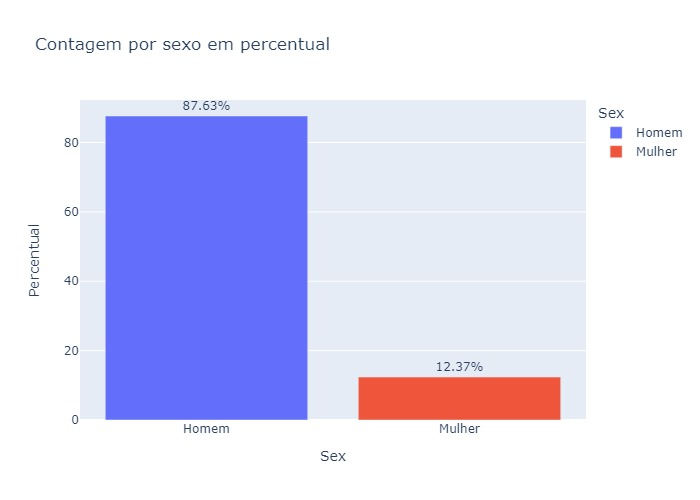

In [26]:


# Suponha que 'df' seja o seu DataFrame contendo a coluna 'Sex'

# Calcula a contagem por sexo
count_by_sex = df['Sex'].value_counts()

# Calcula a porcentagem por sexo
percentage_by_sex = (count_by_sex / count_by_sex.sum()) * 100

# Cria um novo DataFrame para armazenar as informações da contagem em percentual
df_percent = pd.DataFrame({'Sex': percentage_by_sex.index, 'Percentual': percentage_by_sex.values})

# Cria o histograma usando o DataFrame com os valores em percentual
fig = px.bar(df_percent, x="Sex", y="Percentual", color='Sex', title='Contagem por sexo em percentual')

# Adiciona os rótulos dos percentuais acima das barras
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Exibe o histograma
fig.show()


Percebe-se que a base existem mais homens que mulheres

### QUAL A MÉDIA DE IDADE POR SEXO?

In [27]:
# Tirando a média de idades entre homens e mulheres.
média_idade_ = df.groupby("Sex")["idade"].mean().reset_index().sort_values("idade", ascending=False)
média_idade_

,Sex,idade
0,Homem,44.886173
1,Mulher,44.662519


Percebe-se que não existem diferenças entre as médias de idade entre homens e mulheres, o que pressupõe que a idade naõ tem interferencia apesar da discrepancias na quantidade dos gêneros

### QUAL A MÉDIA DE PREÇOS POR SEXO

In [28]:
#me´di
média_preco_sexo = df.groupby("Sex")["preco_desc"].mean().reset_index().sort_values("Sex", ascending=False)
média_preco_sexo

,Sex,preco_desc
1,Mulher,221.293845
0,Homem,221.479908


A média de preço com descontos  entre homens e mulheres são iguais , validando que os gêneros não interferem nas vendas

### QUAL A QUANTIDADE DE PRODUTO ?

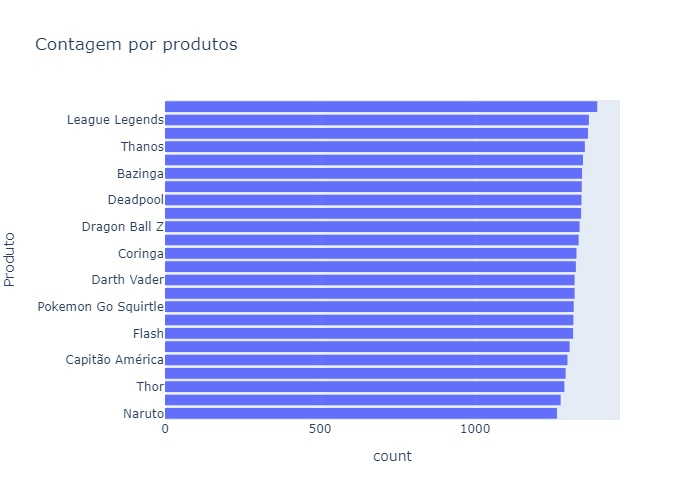

In [29]:


# Primeiro, você pode obter a contagem de cada produto no DataFrame
contagem_produto = df['Produto'].value_counts()

# Em seguida, você pode criar uma lista com os nomes dos produtos ordenados por contagem decrescente
produtos_ordenados = contagem_produto.index.tolist()

# Agora, passamos a lista de produtos ordenados para o argumento category_orders
fig = px.histogram(df, y="Produto", title='Contagem por produtos', category_orders={"Produto": produtos_ordenados})

# Mostra o gráfico
fig.show()


Aqui foi interessante contar as quantidades dos produtos para mapear se existem grandes diferenças nos quantitativos, porém percebe-se que todos produtos tem quantidade entre 1200 e 1400.

### QUAL A MÉDIA DE IDADE AGRUPADA POR GÊNERO E PRODUTOS

In [30]:
# Média de idade agrupada
media_idade_agr= df.groupby(['Produto','Sex'])["idade"].mean().reset_index().sort_values("idade", ascending=True)
media_idade_agr

,Produto,Sex,idade
5,Bazinga,Mulher,42.710843
3,Batman,Mulher,43.194969
1,BIXDream,Mulher,43.672840
47,Wolverine,Mulher,43.915344
33,Pantera Negra,Mulher,43.955128
27,League Legends,Mulher,43.968912
21,Flash,Mulher,43.988571
15,Darth Vader,Mulher,44.135484
4,Bazinga,Homem,44.163698
8,Capitão América,Homem,44.204010


Foi interessante verificar a média de idade agrupada por produto e gênero, não existem diferenças absurdas, ainda que o produto de maior e menor idade ser do grupo feminino.

# Buscando os clientes acima dos 46 anos

In [31]:
# buscando idade acima de 46 anos
idade_maior_46= df[df['idade']>46]
idade_maior_46

,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,Produto,Size,Cidade,uf_loja,Sex,idade,preco_desc
8,002552c0663708129c0019cc97552d7d3,14148,0.10,249.2,1,4,2018-04-27,Tempestade,G,Curitiba,PR,Homem,62,249.10
9,00088930e925c41fd95ebfe695fd26553,14148,0.10,117.6,1,4,2018-07-09,Thor,G,Curitiba,PR,Homem,62,117.50
10,0030026a6ddb3b2d1d4bc225b4b4c4da3,14148,0.10,233.8,1,4,2019-11-29,League Legends,G,Curitiba,PR,Homem,62,233.70
11,002552c0663708129c0019cc97552d7d3,14166,0.10,249.2,1,4,2019-02-21,Tempestade,G,Curitiba,PR,Homem,51,249.10
12,0021a87d4997a48b6cef1665602be0f53,14166,0.10,214.2,1,4,2018-04-08,Super Mario,G,Curitiba,PR,Homem,51,214.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31821,001b72dfd63e9833e8c02742adf472e32,16620,0.10,201.6,1,9,2018-04-07,Wolverine,M,Belo horizonte,MG,Homem,55,201.50
31822,001b72dfd63e9833e8c02742adf472e32,19611,0.10,201.6,1,9,2018-11-03,Wolverine,M,Belo horizonte,MG,Homem,67,201.50
31825,0021a87d4997a48b6cef1665602be0f52,26024,0.08,214.2,2,9,2019-12-10,Super Mario,M,Belo horizonte,MG,Homem,62,214.12
31826,0021a87d4997a48b6cef1665602be0f52,26187,0.10,214.2,1,9,2019-02-17,Super Mario,M,Belo horizonte,MG,Homem,52,214.10


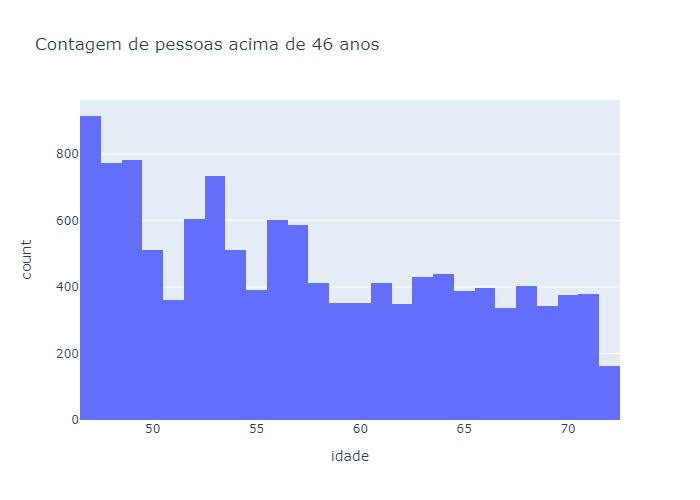

In [32]:
import plotly.express as px


# Cria o histograma apenas para as idades acima de 46 anos
fig = px.histogram(idade_maior_46, x="idade", title='Contagem de pessoas acima de 46 anos')

# Exibe o histograma
fig.show()


Aqui fizemos observação das contagens das distrbuições dos clientes acima de 46 anos, e percbe-se que entre esse grupo de pessoas se concentrama entre 46 e 57 anos.

## AQUI BUSQUEI AS VENDAS ACUMULADAS DOS CLIENTES MAIORES QUE 46 ANOS

In [33]:
# aqui busquei o acaumulado das vendas acima dos 46 anos
vendas_mais46= idade_maior_46.groupby(['Produto','idade'])["preco_desc"].sum().reset_index().sort_values("preco_desc", ascending=False)


# calcular as colunas "% of Total Sales" e "Cum % of Total Sales"
vendas_mais46["% of Total vendas_acima_46"] = (vendas_mais46["preco_desc"] /vendas_mais46["preco_desc"].sum()) * 100

# aqui calculamos o a cumulado das vendas
vendas_mais46["% of Total vendas acumuladas_acima_46"]= vendas_mais46["% of Total vendas_acima_46"].cumsum()
vendas_mais46




,Produto,idade,preco_desc,% of Total vendas_acima_46,% of Total vendas acumuladas_acima_46
1,BIXDream,48,26750.36,0.985386,0.985386
0,BIXDream,47,25378.54,0.934853,1.920240
2,BIXDream,49,21263.10,0.783256,2.703495
10,BIXDream,57,19205.38,0.707457,3.410952
6,BIXDream,53,17147.72,0.631660,4.042612
...,...,...,...,...,...
129,Capitão América,72,778.06,0.028661,99.907636
207,Darth Vader,72,741.54,0.027316,99.934952
571,Thanos,72,649.20,0.023914,99.958866
389,Mulher-Maravilha,72,593.24,0.021853,99.980719


Aqui verifica-se que 63% dos clientes acima de 46 anos tem um acumulado de 17.147 reais , e 98% tem acumulado em vendas um total 26.750. isso significa um público a ser observado com atenção especial no que tange a campanhas de marketing.

### Qual o valor de vendas por produtos e idade

In [34]:
# vendas acumuladas por produtos
venda_produtor= df.groupby(['Produto','idade'])["preco_desc"].sum().reset_index().sort_values("preco_desc", ascending=False)
venda_produtor

,Produto,idade,preco_desc
15,BIXDream,38,49385.40
16,BIXDream,39,39096.78
20,BIXDream,43,38410.82
11,BIXDream,34,37038.90
14,BIXDream,37,36353.00
...,...,...,...
505,Flash,22,204.32
807,Pantera Negra,22,201.50
909,Rick Morty,22,190.30
1061,Thanos,22,162.32


In [35]:
# calcular as colunas "% of Total Sales" e "Cum % of Total Sales"
venda_produtor["% of Total vendas"] = (venda_produtor["preco_desc"] /venda_produtor["preco_desc"].sum()) * 100

# aqui calculamos o a cumulado das vendas
venda_produtor["% of Total vendas acumuladas"]= venda_produtor["% of Total vendas"].cumsum()
venda_produtor

,Produto,idade,preco_desc,% of Total vendas,% of Total vendas acumuladas
15,BIXDream,38,49385.40,0.700384,0.700384
16,BIXDream,39,39096.78,0.554471,1.254855
20,BIXDream,43,38410.82,0.544743,1.799598
11,BIXDream,34,37038.90,0.525286,2.324884
14,BIXDream,37,36353.00,0.515559,2.840442
...,...,...,...,...,...
505,Flash,22,204.32,0.002898,99.990237
807,Pantera Negra,22,201.50,0.002858,99.993094
909,Rick Morty,22,190.30,0.002699,99.995793
1061,Thanos,22,162.32,0.002302,99.998095


Aqui tem o produto BIXDream, representa 51% do total das vendas , validando que o produto com maior valor real em vendas variando entre 36 e 49 mil reais

### QUAIS OS TOP 10 CLIENTES COM MAIOR VALOR DE VENDAS

In [36]:
#vendas por identificador de clientes
top10_clientes= df.groupby(['ClientID'])["preco_desc"].sum().reset_index().sort_values("preco_desc", ascending=False)
top10_clientes[:10]

,ClientID,preco_desc
8306,22864,2898.84
3538,17631,2487.02
2254,16316,2460.48
11749,26908,2420.08
2573,16642,2410.22
6285,20514,2408.92
13239,28670,2247.80
2345,16410,2212.86
9389,24129,2201.74
8619,23220,2177.82


Aqui buscamos os clientes com maiores vendas , sendo que os 10 maiores clientes variam entre 2100, e 2800 reais.

### QUAIS OS 10  CLIENTES COM MENOR VALOR DE  VENDAS?

In [37]:
# piore clientes em vendas
Cliente_10_piores= df.groupby(['ClientID'])["preco_desc"].sum().reset_index().sort_values("preco_desc", ascending=True)
Cliente_10_piores[:10]

,ClientID,preco_desc
967,14999,114.7
1914,15969,114.7
12846,28197,114.7
2501,16569,114.7
11321,26415,114.7
7490,21921,114.7
588,14607,114.7
5495,19640,114.7
3262,17345,114.7
7659,22119,114.7


Os 10 clientes que menos vendas estão em torno de 114 reais

### QUAIS  10 OS CLIENTES  COM MAIOR VALOR DE VENDAS POR CIDADE?

In [38]:
top10_cidade= df.groupby(['ClientID','Cidade'])["preco_desc"].sum().reset_index().sort_values("preco_desc", ascending=False)
top10_cidade[:10]

,ClientID,Cidade,preco_desc
8306,22864,Florianópolis,2898.84
3538,17631,Rio de janeiro,2487.02
2254,16316,Curitiba,2460.48
11749,26908,Rio de janeiro,2420.08
2573,16642,Florianópolis,2410.22
6285,20514,Rio de janeiro,2408.92
13239,28670,Rio de janeiro,2247.80
2345,16410,Rio de janeiro,2212.86
9389,24129,Florianópolis,2201.74
8619,23220,Curitiba,2177.82


Observando as 10 clientes por cidades em valores de vendas, destaque para Florianópolis

### QUAIS OS 10 CLIENTES COM MENOR VALORES DE VENDAS POR CIDADE?

In [39]:
piores10_cidade= df.groupby(['ClientID','Cidade'])["preco_desc"].sum().reset_index().sort_values("preco_desc", ascending=True)
piores10_cidade[:10]

,ClientID,Cidade,preco_desc
967,14999,Rio de janeiro,114.7
1914,15969,Florianópolis,114.7
12846,28197,Curitiba,114.7
2501,16569,Rio de janeiro,114.7
11321,26415,Sao paulo,114.7
7490,21921,Florianópolis,114.7
588,14607,Florianópolis,114.7
5495,19640,Porto alegre,114.7
3262,17345,Rio de janeiro,114.7
7659,22119,Curitiba,114.7


Aquiidentifico os 10 clientes com menores valores de vendas por cidade

### QUAIS AS 10 CIDADES QUE MAIS VENDEM?

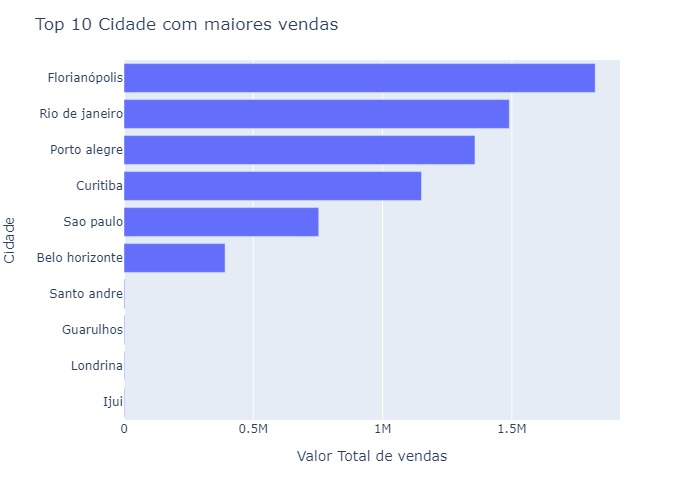

In [40]:
#ciades com maiores valore de vendas
cidade_top10= df.groupby(['Cidade'])["preco_desc"].sum().reset_index().sort_values("preco_desc", ascending=False)
cidade_top10[:10]

fig = px.bar(cidade_top10[:10].sort_values('preco_desc', ascending=True), x="preco_desc", y="Cidade", orientation="h")

# atualizar as configurações de layout do gráfico
fig.update_layout(
    title="Top 10 Cidade com maiores vendas",
    xaxis_title="Valor Total de vendas",
    yaxis_title="Cidade"
)

# exibir o gráfico
fig.show()


Florianópolis Rio de janeiro e Porto alegre, são as cidades com as maiores vendas entre as to_10, com valores de 1.822,1.490 e 1.357 respectivamente em valore reais. 

### É IMPORTANTE ANALISAR SE A QUANTIDADE DE LOJA TEM RELAÇÃO COM OS NÚMERO DE VENDAS NOS ESTADOS

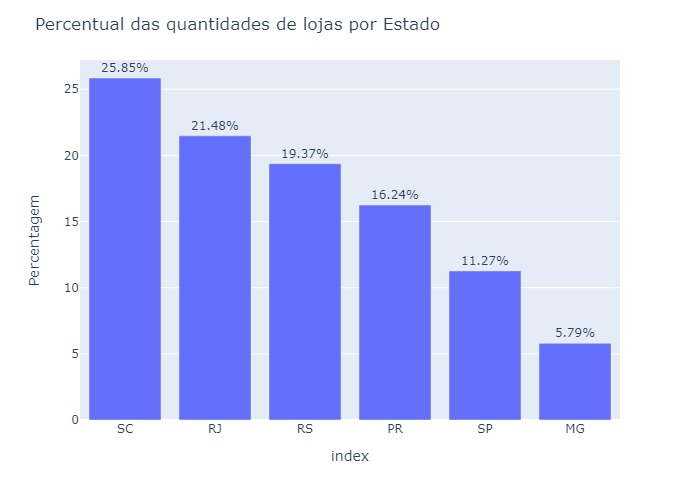

In [41]:
# contando em percentual as lojas
percentage=df['uf_loja'].value_counts(normalize=True)*100
percentage

fig = px.bar(percentage, x=percentage.index, y=percentage.values, text=percentage.values, labels={"x": "Nota", "y": "Percentagem"})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    title="Percentual das quantidades de lojas por Estado")
fig.show()

Aqui valida que os estados tem relaçãodireta com as vendas entre as cidades

### TIRANDO A MÉDIA AGREGADA

In [42]:
#valor agregado 
valor_agregado=df.groupby(['Size','Sex',])['preco_desc'].mean().reset_index().sort_values("preco_desc", ascending=False)
valor_agregado







,Size,Sex,preco_desc
7,P,Mulher,224.683021
6,P,Homem,223.673421
1,G,Mulher,223.119557
4,M,Homem,222.597226
0,G,Homem,221.776286
5,M,Mulher,214.619934
3,GG,Mulher,160.907347
2,GG,Homem,160.905889


Aqui observa que o tamanho "GG" tem média de preços de vendas menores 

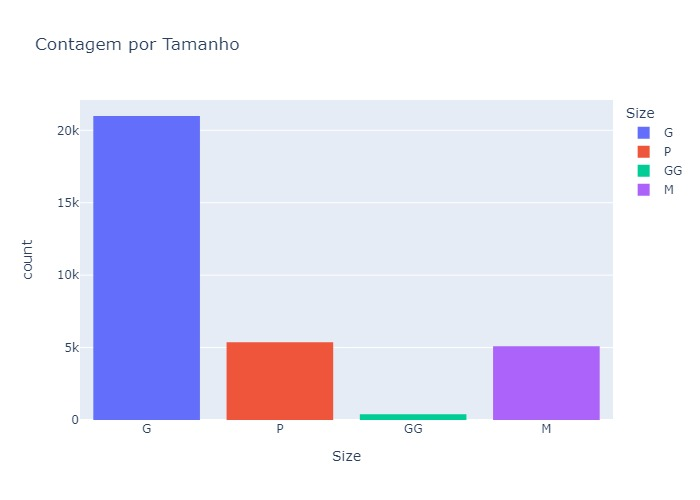

In [43]:
#contagem de produtos por tamanho

fig = px.histogram(df, x="Size", color='Size', title='Contagem por Tamanho')
fig.show()

Aqui percebbe-se que a maioria ds produtos são do tipo G, isso pressuões que a deveria ter informações quanto ao peso, altura para melhorar as informações.

# STORYTELLING DOS DADOS

Vanio Tosta, foi o analista de dados escolhido pela empresa  de consultoria contratada para solucionar os problemas do cliente , ele foi escolhido com base em sua expertise com o negócio e sua experiência com os dados , pois o cliente quer informações gerais sobre seu perfil de clientes para assim tomar as melhores decisões do ponto de vista de gestão.
Sendo assim , Vanio chegou as seguintes insights, com base nas perguntas e respostas feitas durante as análises.

- Apesar da maioria dos clientes serem homens (87%), o gênero e as média de idade não interferem nas vendas, mas é importante definir esses públicos pois podem ser usados em campanhas de marketing segmentadas aos público alvo. Tão logo, a média de idade entre homens e mulheres é de 44 anos.

- Os clientes tem idade entre 22 e 72 anos, ou seja , não tem público infantil e nem adolescentes, o que define seu público como adulto. Sendo assim , seria interessante para a área de negócio segmentar públicos alvo entre faixas de idade para melhor gestão,campanhas de marketing e administração de estoques e compras de produtos.

- Como sugestão,seria interessante se trabalhar com público adulto jovem entre 22 e 39 anos, entre adultos de 40 e 59 anos, e público acima de 60 anos.

- Ao verificar clientes acima de 46 anos, verificou-se que 63% tem vendas acumuladas de 17.147 reais , e 98% tem acumulado em vendas um total 26.750. isso significa um público a ser observado com atenção especial no que tange a campanhas de marketing.

- Ao observar as marcas dos produtos, o produto BIXDream, representa 51% do toal das vendas, e seu valor real em vendas acumuladas varia entre 36 e 49 mil reais, o que requer uma atenção especial a essa marca em determimento aos outros produtos.

- Listamos os 10 maiores clientes por ID únicos, e verificamos que os clientes com maiores vendas variam entre 2100 e 2800 reais vistos individualmente, enquanto que, os 10 piores clientes em vendas estão com 114 reais.

- Verificamos as 10 cidades que mais vendem, e entre elas, se destacaram Florianópolis, Rio de janeiro e Porto alegre, com valores de 1.822 reais, 1.490 reais e 1.357 reais respectivamente.

- Ao analisar os 10 Estados que mais vendem, e observando a relação com as cidades, observou-se que Santa Catarina, Rio de janeiro e Rio Grande do Sul representam 62,7% das vendas, e que tem relação com as cidades que mais vendem.

- A média de preços vendidos por tamanho, as "GG" são as menores, 160 reais em comparação a outros tamanhos que chegam acima de 200 reais.

- Quanto as quantidades vendidas, o tamanho "G" são as que mais vendem , e as "GG" as que menos vendem, isso pode levar as informações futuras quanto ao peso, altura e tratar essas informações para definir uma melhor política de compras e de gestão de estoques.


Sendo assim, esses insights podem ser trabalhados pela empresa contratante buscando melhorar sua gestão, tanto do ponto de vista  do perfil dos seus clientes e da administração, seja para campanhas de marketing, segmentação de clientes, gestão logística de compras e estoques, e  melhorar canais de comunicação internas e externas com seus parceiros e clientes.